## Завантаження даних

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
dataset_2d = pd.read_csv('/content/drive/MyDrive/HW6/data_2d.csv')
dataset_mnist = pd.read_csv('/content/drive/MyDrive/HW6/mnist.csv')



## Попередня інформація про дані

In [5]:
print("\nДатасет MNIST:")
dataset_mnist.info()


Датасет MNIST:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 3.0 MB


In [6]:
print("\nДатасет MNIST:")
dataset_mnist.describe()


Датасет MNIST:


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,499.000000,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0,...,499.000000,499.000000,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0
mean,4.372745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.507014,0.256513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.874437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.325835,5.730067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("Двовимірний датасет:")
dataset_2d.info()


Двовимірний датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   0.000000000000000000e+00   199 non-null    float64
 1   -7.687164597386728637e-01  199 non-null    float64
 2   4.608603078297135447e-01   199 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [8]:
print("Двовимірний датасет:")
dataset_2d.describe()

Двовимірний датасет:


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
count,199.000000,199.000000,199.000000
mean,0.502513,1.771587,2.220299
std,0.501255,1.230001,1.604383
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.880885,0.979439
50%,1.000000,1.736607,2.283748
75%,1.000000,2.707277,3.608612
max,1.000000,4.554605,5.722027


In [9]:
# Перевірка, чи вся колонка містить тільки нулі
all_zeros = dataset_2d.all().eq(0)

print("Колонки з тільки нульовими значеннями:")
all_zeros[all_zeros].index


Колонки з тільки нульовими значеннями:


Index(['0.000000000000000000e+00'], dtype='object')

In [10]:
df_2d_without_zeros = dataset_2d.dropna(axis=1, how='all')

df_2d_without_zeros


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [11]:
dataset_2d

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


##  Алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористаємось ліктевим методом.

Будуємо на максимальну кількість кластерів для двомірного масиву 199 шт.

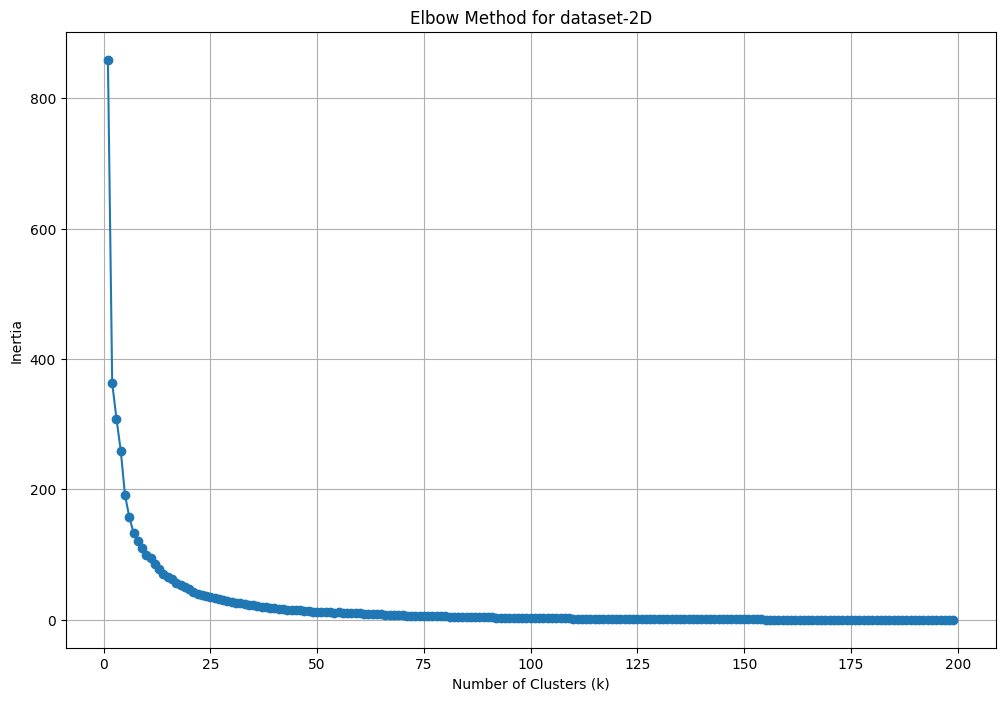

In [12]:
# Створення списку для збереження значень інерції
inertia_values = []

# Визначення можливих кількостей кластерів
possible_k_values = range(1, 200)

# Обчислення інерції для кожної кількості кластерів
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(dataset_2d)
    inertia_values.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(12, 8))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for dataset-2D')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(2)
plt.show()


Із графіка видно, що лікоть знаходиться приблизно на 7-10 кластерах

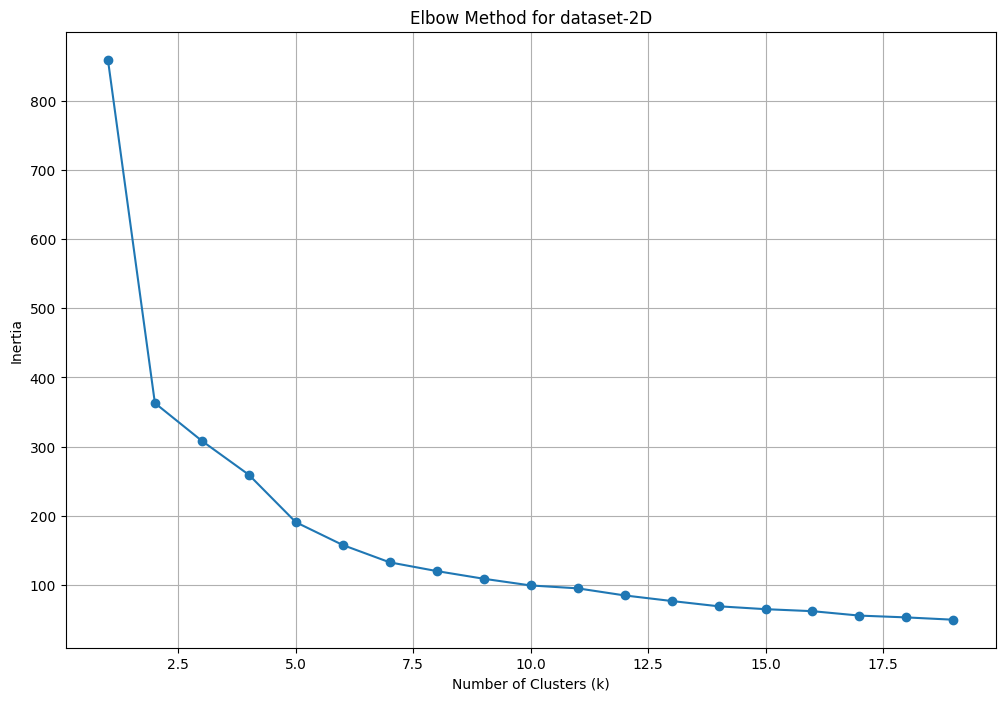

In [13]:
# Створення списку для збереження значень інерції
inertia_values = []

# Визначення можливих кількостей кластерів
possible_k_values = range(1, 20)

# Обчислення інерції для кожної кількості кластерів
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(dataset_2d)
    inertia_values.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(12, 8))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for dataset-2D')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(2)
plt.show()

## PCA для dataset_mnist

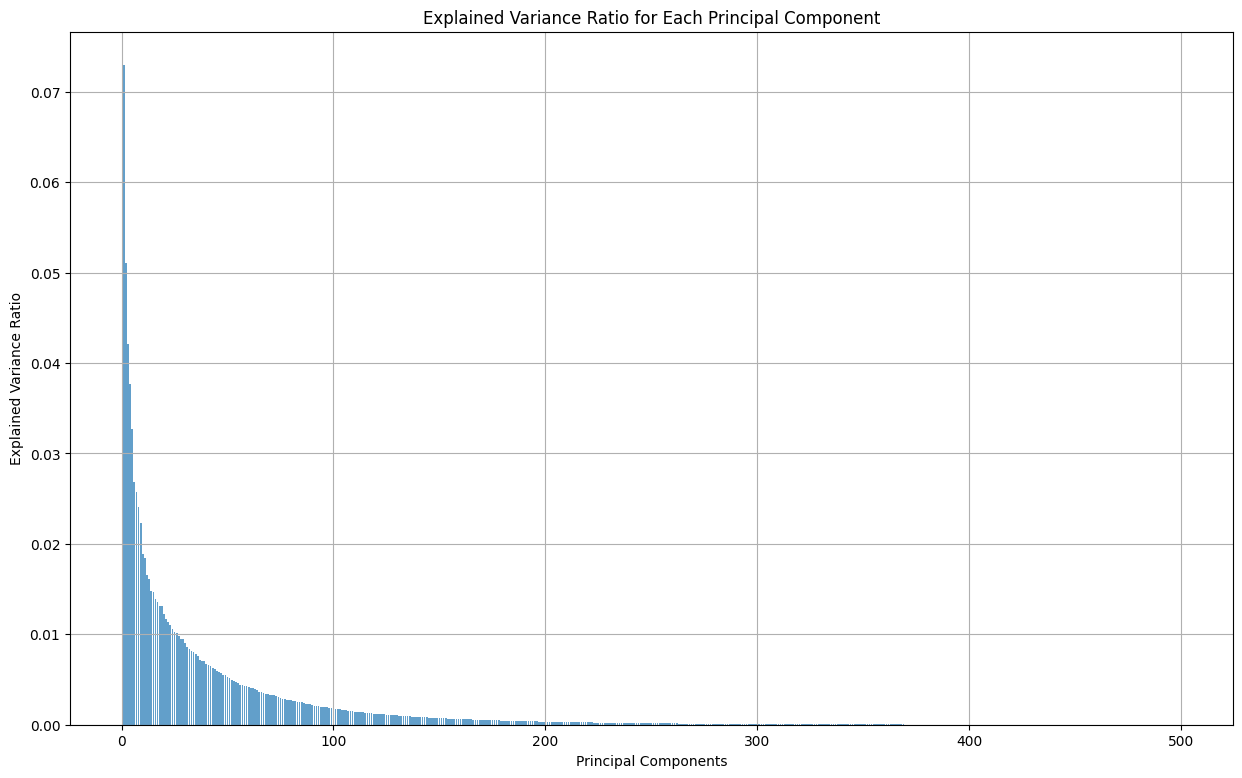

In [14]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(dataset_mnist)

pca = PCA()
pca_result = pca.fit_transform(normalized_data)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(15, 9))
plt.grid(2)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()


In [15]:
normalized_data

array([[-0.82629278,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.17453611,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.52277944,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12980613,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.52277944,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56668052,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Знайдемо головні компоненти для різних порогів пояснення дисперсії.

In [17]:
# Список порогів для Explained Variance Ratio
thresholds = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.99]

result_df = pd.DataFrame(columns=['Threshold', 'Num Components', 'Explained Variance Ratio'])

for threshold in thresholds:
    pca = PCA(n_components=threshold)
    pca_result = pca.fit_transform(normalized_data)

    result_df = pd.concat([result_df, pd.DataFrame({
        'Threshold': [threshold],
        'Num Components': [pca.n_components_],
        'Explained Variance Ratio': [sum(pca.explained_variance_ratio_)]
    })], ignore_index=True)

result_df


,Threshold,Num Components,Explained Variance Ratio
0,0.01,1,0.072974
1,0.02,1,0.072974
2,0.05,1,0.072974
3,0.10,2,0.124006
4,0.20,4,0.203692
5,0.50,20,0.500844
6,0.80,64,0.801193
7,0.90,103,0.900651
8,0.95,147,0.950688
9,0.99,251,0.990154


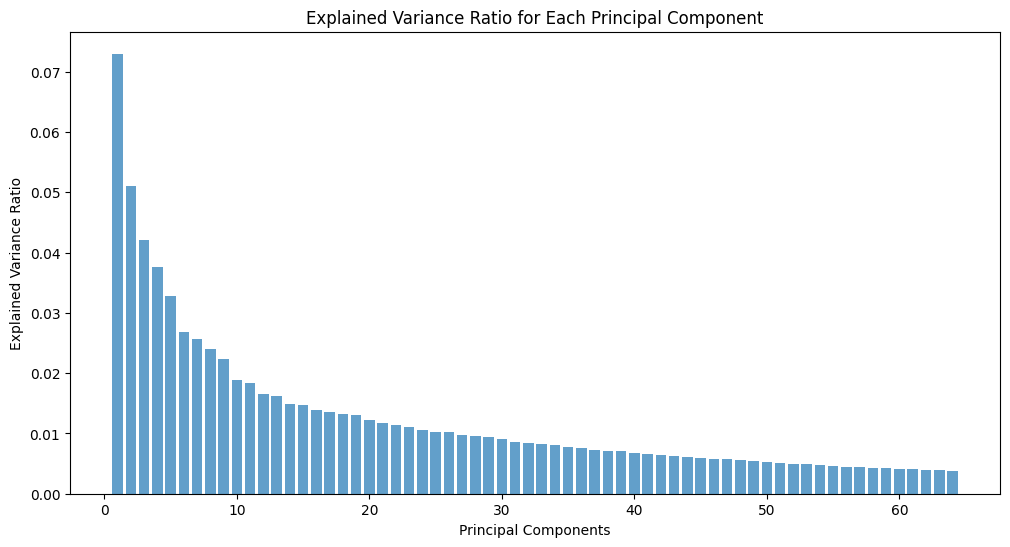

Кількість головних компонент, які пояснюють 80% дисперсії: 64


In [18]:
# Застосування PCA зі збереженням 80% дисперсії
pca = PCA(n_components=0.8)

# Результуючі ознаки після PCA
pca_result = pca.fit_transform(normalized_data)

# Кількість вибраних головних компонент
num_components = pca.n_components_

plt.figure(figsize=(12, 6))
plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

print(f"Кількість головних компонент, які пояснюють 80% дисперсії: {num_components}")


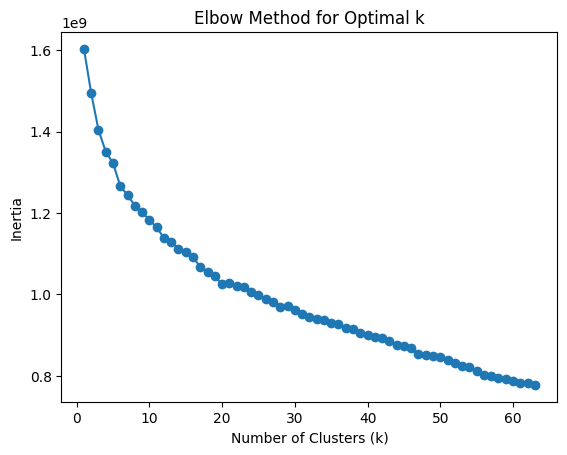

In [19]:
inertia_values = []

possible_k_values = range(1, 64)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(dataset_mnist)
    inertia_values.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

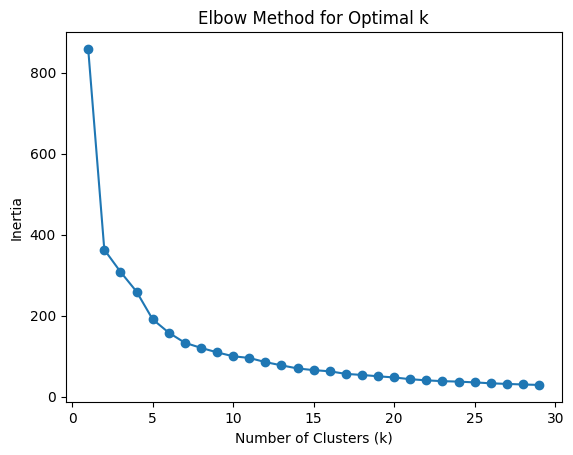

Назви колонок: Index(['0.000000000000000000e+00', '-7.687164597386728637e-01',
       '4.608603078297135447e-01'],
      dtype='object')


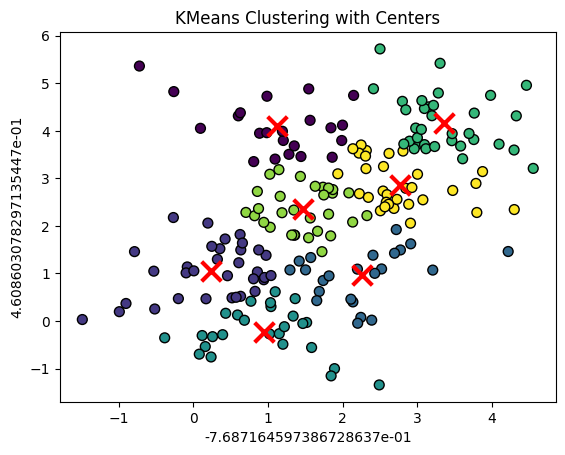

In [22]:
# Визначення можливих кількостей кластерів
possible_k_values = range(1, 30)


inertia_values = []

# Обчислення інерції для кожної кількості кластерів
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(dataset_2d)
    inertia_values.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Вибір оптимальної кількості кластерів
optimal_k = 7

# Використання KMeans для визначення центрів кластерів
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init="auto").fit(dataset_2d)

# Виведення назв колонок
print("Назви колонок:", dataset_2d.columns)

# Візуалізація точок та центрів кластерів
plt.scatter(dataset_2d.iloc[:, 1], dataset_2d.iloc[:, 2], c=kmeans.labels_, cmap='viridis', marker='o', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=200, linewidths=3)


# Встановлення заголовка та міток осей


plt.title('KMeans Clustering with Centers')
plt.xlabel(dataset_2d.columns[1])
plt.ylabel(dataset_2d.columns[2])
# Відображення графіка
plt.show()


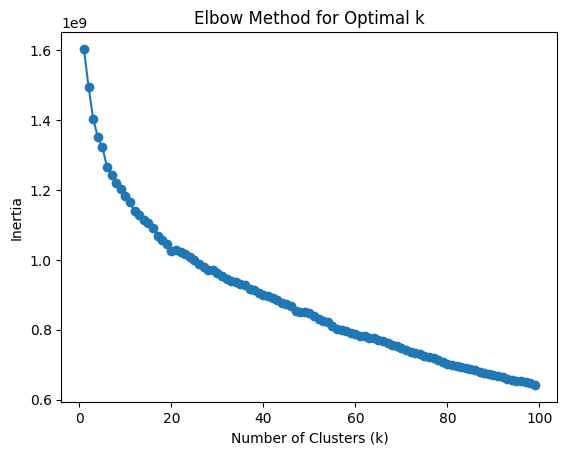

In [23]:
# Визначення можливих кількостей кластерів
possible_k_values = range(1, 100)

# Створення списку для збереження значень інерції
inertia_values = []

# Обчислення інерції для кожної кількості кластерів
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(dataset_mnist)
    inertia_values.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



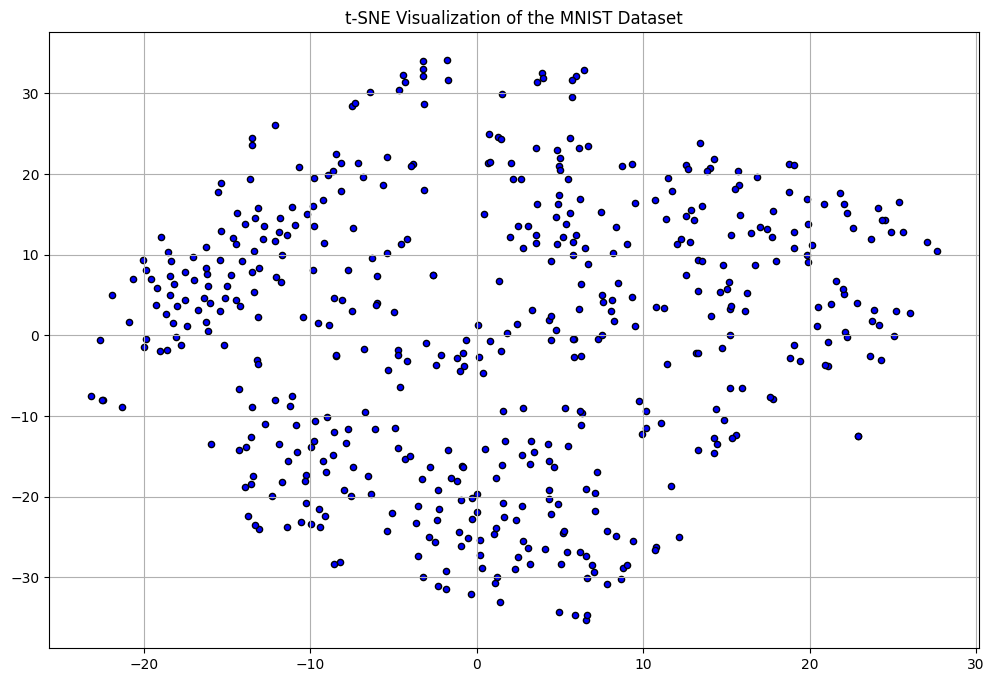

In [46]:
data_for_tsne_mnist = dataset_mnist.iloc[:, 0:]

pca_mnist = PCA(n_components=499)
pca_result_mnist = pca_mnist.fit_transform(data_for_tsne_mnist)

tsne_mnist = TSNE(n_components=2, random_state=0)
tsne_result_mnist = tsne_mnist.fit_transform(pca_result_mnist)

plt.figure(figsize=(12, 8))
plt.grid(2)
plt.scatter(tsne_result_mnist[:, 0], tsne_result_mnist[:, 1], marker='o', s=20, c="b", edgecolor='k')

plt.title('t-SNE Visualization of the MNIST Dataset')
plt.show()



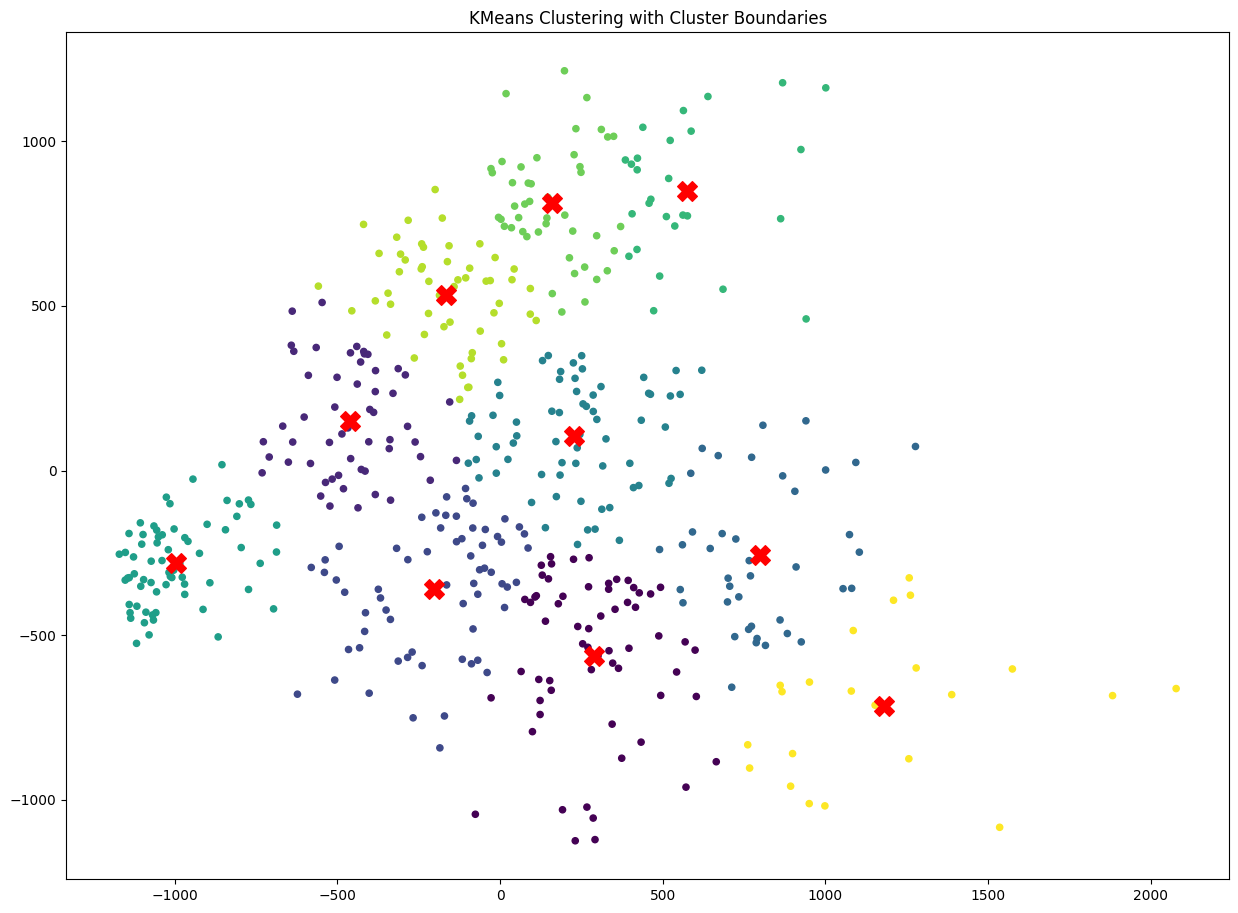

In [61]:
# Вибрали всі колонки для аналізу
data_for_clustering = dataset_mnist

# Зменшення розмірності за допомогою PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)

# Кластеризація з використанням KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(data_pca)


# Візуалізація результатів з границями кластерів
plt.figure(figsize=(15, 11))

# Відображення кластерів
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=20, linewidth=1)

# Відображення центрів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers', linewidth=1)


plt.title('KMeans Clustering with Cluster Boundaries')
plt.show()


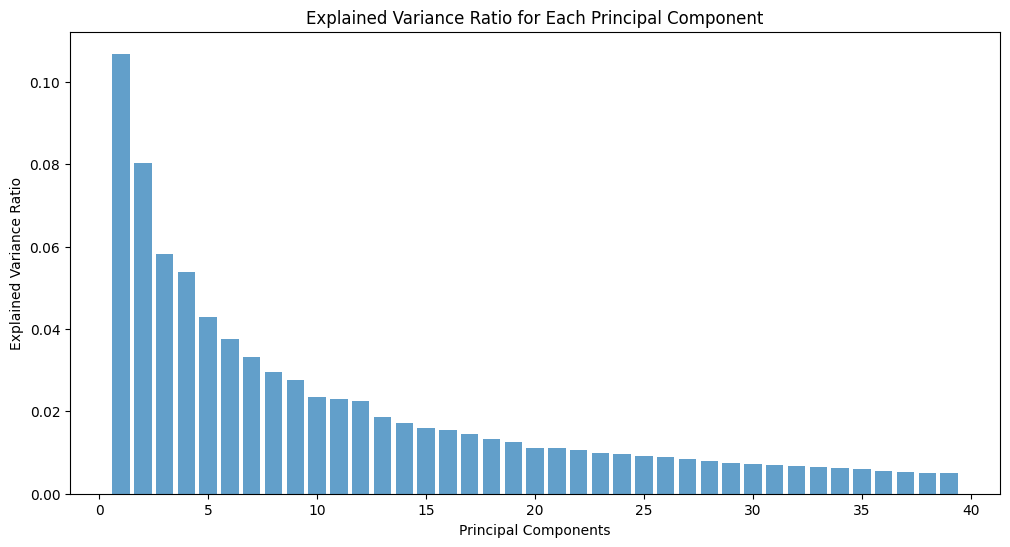

Кількість головних компонент, які пояснюють 80% дисперсії: 39


In [37]:
# Застосування PCA зі збереженням 80% дисперсії
pca = PCA(n_components=0.8)

#
pca_result = pca.fit_transform(dataset_mnist)

num_components = pca.n_components_

plt.figure(figsize=(12, 6))
plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

print(f"Кількість головних компонент, які пояснюють 80% дисперсії: {num_components}")

dataset_2d

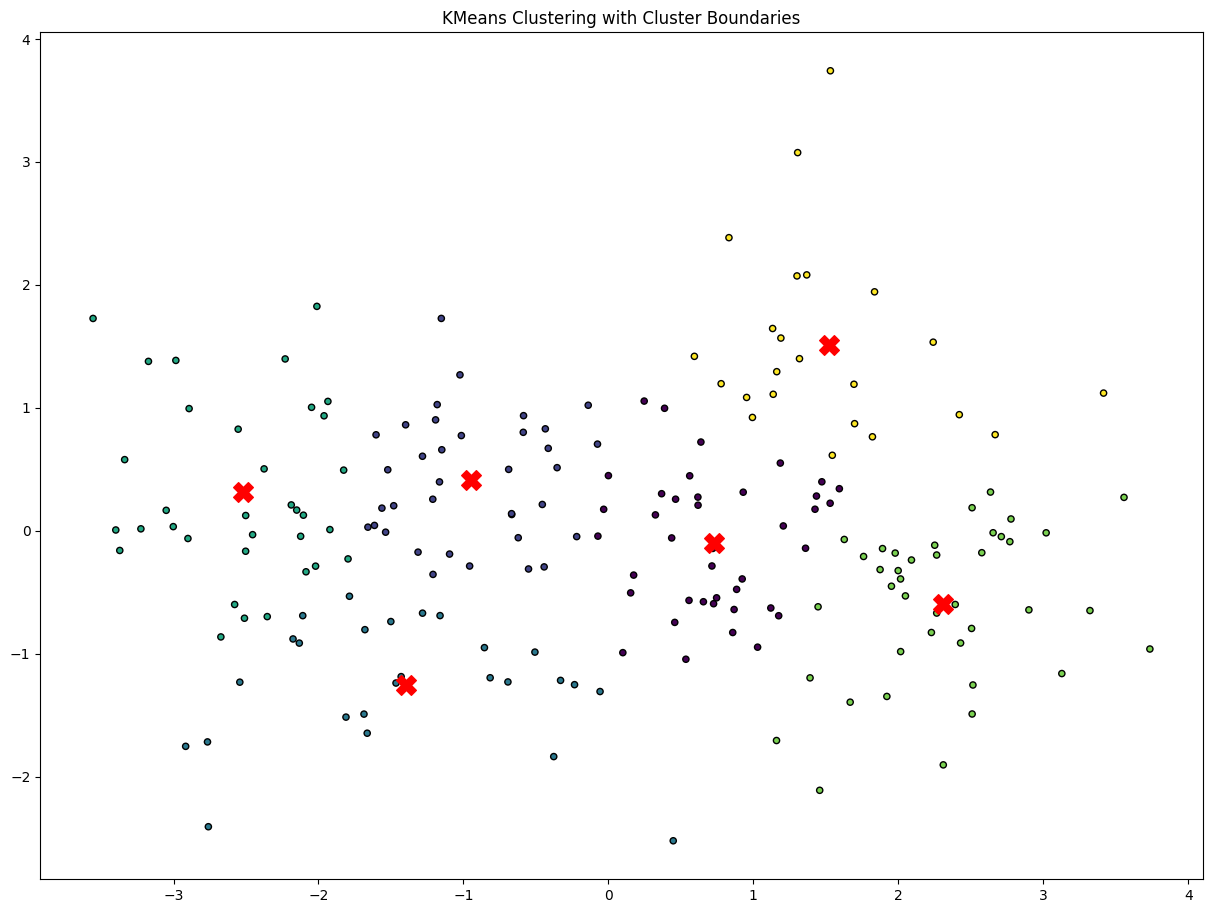

In [62]:
# беремо всі колонки
data_for_clustering = dataset_2d

# Зменшення розмірності за допомогою PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)

# Кластеризація з використанням KMeans
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(data_pca)

plt.figure(figsize=(15, 11))

# Відображення кластерів
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=20, edgecolor='k')

# Відображення центрів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers', linewidth=1)

plt.title('KMeans Clustering with Cluster Boundaries')
plt.show()

